In [8]:
#Import Dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [9]:
#Read in data
exo = pd.read_csv('../data/clean_data.csv')
#Remove vestial index column
exo.drop('Unnamed: 0', axis=1, inplace=True)
exo.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,...,793.0,93.59,35.8,1.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,...,443.0,9.11,25.8,2.0,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,175.850252,0.969,1.78220,10829.0,...,638.0,39.30,76.3,1.0,5853.0,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,...,1395.0,891.96,505.6,1.0,5805.0,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,...,1406.0,926.16,40.9,1.0,6031.0,4.438,1.046,288.75488,48.226200,15.509


In [10]:
#Set X and y
X = exo.drop("koi_disposition", axis=1)
y = exo["koi_disposition"]
target_names = ["CONFIRMED", "FALSE POSITIVE", "CANIDATE"]

In [12]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
#Set scalars for the data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.789
k: 3, Train/Test Score: 0.888/0.803
k: 5, Train/Test Score: 0.867/0.805
k: 7, Train/Test Score: 0.857/0.805
k: 9, Train/Test Score: 0.847/0.814
k: 11, Train/Test Score: 0.842/0.814
k: 13, Train/Test Score: 0.837/0.805
k: 15, Train/Test Score: 0.835/0.807
k: 17, Train/Test Score: 0.833/0.807
k: 19, Train/Test Score: 0.828/0.806
k: 21, Train/Test Score: 0.829/0.809
k: 23, Train/Test Score: 0.825/0.814
k: 25, Train/Test Score: 0.825/0.808
k: 27, Train/Test Score: 0.824/0.810
k: 29, Train/Test Score: 0.822/0.808
k: 31, Train/Test Score: 0.822/0.807
k: 33, Train/Test Score: 0.823/0.807
k: 35, Train/Test Score: 0.820/0.807
k: 37, Train/Test Score: 0.819/0.810
k: 39, Train/Test Score: 0.819/0.812
k: 41, Train/Test Score: 0.818/0.807
k: 43, Train/Test Score: 0.818/0.806
k: 45, Train/Test Score: 0.820/0.806
k: 47, Train/Test Score: 0.815/0.803
k: 49, Train/Test Score: 0.815/0.806


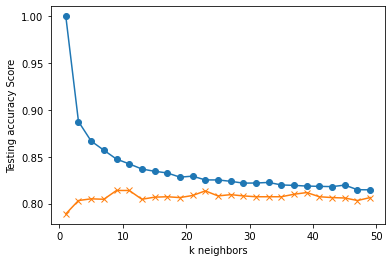

In [14]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
#Check for consistancy in different samples
for i in range(1,26):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=39)
    knn.fit(X_train_scaled, y_train)
    print(f'Sample {i} Test Acc(k=39): {knn.score(X_test_scaled, y_test)}')

Sample 1 Test Acc(k=39): 0.8118015198927134
Sample 2 Test Acc(k=39): 0.8073312472060795
Sample 3 Test Acc(k=39): 0.819400983459991
Sample 4 Test Acc(k=39): 0.8118015198927134
Sample 5 Test Acc(k=39): 0.8068842199374162
Sample 6 Test Acc(k=39): 0.8122485471613768
Sample 7 Test Acc(k=39): 0.8019669199821189
Sample 8 Test Acc(k=39): 0.8252123379526151
Sample 9 Test Acc(k=39): 0.8050961108627627
Sample 10 Test Acc(k=39): 0.7930263746088512
Sample 11 Test Acc(k=39): 0.8104604380867233
Sample 12 Test Acc(k=39): 0.8033080017881091
Sample 13 Test Acc(k=39): 0.8095663835493965
Sample 14 Test Acc(k=39): 0.8109074653553867
Sample 15 Test Acc(k=39): 0.8109074653553867
Sample 16 Test Acc(k=39): 0.7912382655341976
Sample 17 Test Acc(k=39): 0.805543138131426
Sample 18 Test Acc(k=39): 0.8086723290120698
Sample 19 Test Acc(k=39): 0.8261063924899419
Sample 20 Test Acc(k=39): 0.8024139472507823
Sample 21 Test Acc(k=39): 0.8006258381761288
Sample 22 Test Acc(k=39): 0.7934734018775146
Sample 23 Test Acc(k=